In [4]:
# dependencies, including seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# import csv
city_import = "../Lesson-Plans/city_data.csv"
ride_import = "../Lesson-Plans/ride_data.csv"

In [164]:
# read city csv file
city_import_df = pd.read_csv(city_import)
city_import_df.head()

,city,driver_count,type
0,Tammyburgh,11,Urban
1,Melissaborough,15,Urban
2,Port Brianborough,62,Urban
3,New Katherine,68,Urban
4,Lake Charlesside,65,Urban


In [7]:
# read ride csv file
ride_import_df = pd.read_csv(ride_import)
ride_import_df.head()

,city,date,fare,ride_id
0,Karenfurt,2017-01-01 19:03:03,32.90,3383346995405
1,Melissaborough,2017-01-01 08:55:58,19.59,2791839504576
2,Port Sandraport,2017-01-01 16:21:54,31.04,3341437383289
3,Curtismouth,2017-01-03 06:36:53,15.12,6557246300691
4,Port Michael,2017-01-03 09:56:52,19.65,9887635746234


In [168]:
# merge city and ride csvs
merge_csv = pd.merge(city_import_df, ride_import_df, on="city")
merge_csv.head(10)

,city,driver_count,type,date,fare,ride_id
0,Tammyburgh,11,Urban,2017-01-02 10:56:28,12.40,7963408790849
1,Tammyburgh,11,Urban,2017-01-02 04:28:03,18.78,2315208159060
2,Tammyburgh,11,Urban,2017-01-03 03:00:08,30.10,558639764959
3,Tammyburgh,11,Urban,2017-01-01 00:10:21,7.76,9113511454178
4,Tammyburgh,11,Urban,2017-01-02 05:22:44,22.00,4171010688543
5,Tammyburgh,11,Urban,2017-01-02 21:29:38,5.37,5531485446571
6,Tammyburgh,11,Urban,2017-01-02 23:58:17,11.68,1012442651497
7,Tammyburgh,11,Urban,2017-01-02 21:10:16,31.16,7261786411548
8,Tammyburgh,11,Urban,2017-01-02 00:43:50,10.64,9221421228793
9,Tammyburgh,11,Urban,2017-01-01 12:39:10,9.88,6250336876297


In [9]:
#remove duplicates in cities between csv files
city_import_df = city_import_df.drop_duplicates("city")
city_import_df.head()

,city,driver_count,type
0,Tammyburgh,11,Urban
1,Melissaborough,15,Urban
2,Port Brianborough,62,Urban
3,New Katherine,68,Urban
4,Lake Charlesside,65,Urban


In [169]:
# average fare a city
avg_fare = merge_csv.groupby("city")["fare"].mean()
avg_fare.head(10).round(2)

city
Adamschester     29.59
Alexisfort       27.37
Amberberg        28.62
Anthonyfurt      29.49
Boyleberg        32.40
Brianfurt        24.51
Campbellmouth    34.18
Catherinebury    27.31
Curtismouth      25.05
Davidbury        30.83
Name: fare, dtype: float64

In [170]:
# total rides a city
rides_total = merge_csv.groupby("city")["ride_id"].count()
rides_total.head(10)

city
Adamschester      9
Alexisfort       33
Amberberg        16
Anthonyfurt      17
Boyleberg         5
Brianfurt        22
Campbellmouth     8
Catherinebury    29
Curtismouth      31
Davidbury        20
Name: ride_id, dtype: int64

In [171]:
# total number of drivers a city
drivers_total = merge_csv.groupby("city")["driver_count"].sum()
drivers_total.head()

city
Adamschester    243
Alexisfort      792
Amberberg       208
Anthonyfurt     289
Boyleberg        65
Name: driver_count, dtype: int64

In [195]:
# city type 
city_type = city_import_df.set_index("city")["type"]
city_type.head(10)

city
Tammyburgh           Urban
Melissaborough       Urban
Port Brianborough    Urban
New Katherine        Urban
Lake Charlesside     Urban
New Catherine        Urban
North Rachaelberg    Urban
North Sandra         Urban
Whitneyfurt          Urban
West Nathanville     Urban
Name: type, dtype: object

In [226]:
# need dataframe for series
cities = pd.DataFrame({"Average Fare": avg_fare, "Total Rides": rides_total, "Total Drivers": drivers_total, "City Type": city_type})
cities.head(10).round(2)

,Average Fare,City Type,Total Drivers,Total Rides
Adamschester,29.59,Suburban,243,9
Alexisfort,27.37,Urban,792,33
Amberberg,28.62,Suburban,208,16
Anthonyfurt,29.49,Suburban,289,17
Boyleberg,32.40,Suburban,65,5
Brianfurt,24.51,Urban,88,22
Campbellmouth,34.18,Rural,16,8
Catherinebury,27.31,Urban,203,29
Curtismouth,25.05,Urban,1240,31
Davidbury,30.83,Suburban,260,20


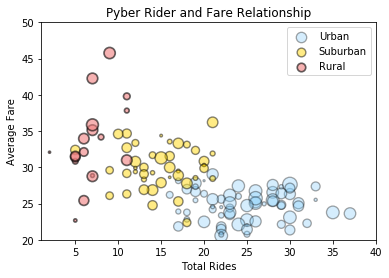

In [295]:
# scatter plots for urban, suburban, rural
urban_plot = plt.scatter(urban["Total Rides"],urban["Average Fare"], facecolors = "lightskyblue", edgecolors = "black", s = urban["Total Drivers"]*0.1,label= "Urban", alpha = 0.35, linewidth = 1.3)
suburban_plot = plt.scatter(suburban["Total Rides"], suburban["Average Fare"], facecolors = "gold", edgecolors = "black", s = urban["Total Drivers"]*0.07, label = "Suburban", alpha = 0.48, linewidth = 1.4)
rural_plot = plt.scatter(rural["Total Rides"], rural["Average Fare"], facecolors = "lightcoral",edgecolors = "black", s = rural["Total Drivers"]*2, label = "Rural", alpha = 0.60, linewidth = 1.7)

plt.xlim(1,40)
plt.ylim(20,50)

# add title and axis labels
plt.title("Pyber Rider and Fare Relationship")
plt.xlabel("Total Rides")
plt.ylabel("Average Fare")

# add legend
plt.legend(handles = [urban_plot, suburban_plot, rural_plot], loc = "upper right")

# show plot
plt.savefig("pyber.png")
plt.show()

In [203]:
# city fare pie chart info
fare_info = merge_csv.groupby(["type"])["fare"].sum()
fare_info

type
Rural        4271.69
Suburban    18779.26
Urban       40093.25
Name: fare, dtype: float64

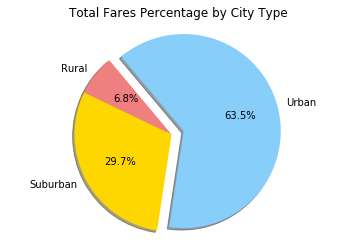

In [213]:
# pie chart specifics
pie_labels = fare_info.index
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0, 0, 0.13)
# plot
pie_chart = plt.pie(fare_info, labels= pie_labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle =130)
plt.title("Total Fares Percentage by City Type")
plt.axis("equal")
plt.show()

In [155]:
# city ride pie chart info
ride_info = merge_csv.groupby(["type"])["ride_id"].count()
ride_info

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

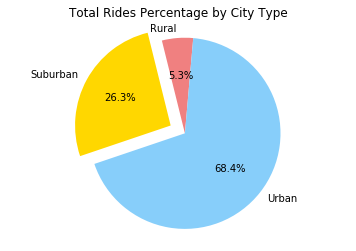

In [156]:
# pie chart specifics
pie_labels2 = ride_info.index
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0, 0.17, 0)
# plot
pie_chart = plt.pie(ride_info, labels= pie_labels2, colors=colors, explode=explode, autopct="%1.1f%%", shadow=False, startangle =85)
plt.title("Total Rides Percentage by City Type")
plt.axis("equal")
plt.show()

In [215]:
# city drivers pie chart info
driver_info = merge_csv.groupby(["type"])["driver_count"].sum()
driver_info.round(2)

type
Rural         662
Suburban     8774
Urban       60935
Name: driver_count, dtype: int64

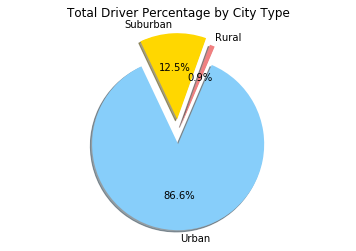

In [217]:
# pie chart specifics
pie_labels3 = driver_info.index
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (0.1, 0.17, 0.12)
# plot
pie_chart = plt.pie(driver_info, labels= pie_labels3, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle =67)
plt.title("Total Driver Percentage by City Type")
plt.axis("equal")
plt.show()